## Data Imput and Preparation

In [1]:
import pandas as pd

uhi_data = pd.read_csv('data/raw data/cleaned_uhi_data.csv')
global_carbon_budget = pd.read_csv('data/raw data/global-carbon-budget.csv')
flat_ui_data = pd.read_csv('data/raw data/flat-ui__data.csv')
global_land_temps_city = pd.read_csv('data/raw data/GlobalLandTemperaturesByMajorCity.csv')
global_land_temps_country = pd.read_csv('data/raw data/GlobalLandTemperaturesByCountry.csv')

global_land_temps_city['dt'] = pd.to_datetime(global_land_temps_city['dt'])
global_land_temps_country['dt'] = pd.to_datetime(global_land_temps_country['dt'])

global_land_temps_city.fillna(method='ffill', inplace=True)
global_land_temps_city.fillna(method='bfill', inplace=True)
global_land_temps_country.fillna(method='ffill', inplace=True)
global_land_temps_country.fillna(method='bfill', inplace=True)

uhi_data.drop_duplicates(inplace=True)
global_carbon_budget.drop_duplicates(inplace=True)
flat_ui_data.drop_duplicates(inplace=True)
global_land_temps_city.drop_duplicates(inplace=True)
global_land_temps_country.drop_duplicates(inplace=True)

uhi_data.to_csv('data/cleaned data/cleaned_uhi_data.csv', index=False)
global_carbon_budget.to_csv('data/cleaned data/cleaned_global_carbon_budget.csv', index=False)
flat_ui_data.to_csv('data/cleaned data/cleaned_flat_ui_data.csv', index=False)
global_land_temps_city.to_csv('data/cleaned data/cleaned_global_land_temps_city.csv', index=False)
global_land_temps_country.to_csv('data/cleaned data/cleaned_global_land_temps_country.csv', index=False)

In [2]:
import geopandas as gpd
import pandas as pd

# Load the shapefile
file_path = "data/raw data/shp/sdei-global-uhi-2013.shp"
data = gpd.read_file(file_path)
# Check for missing values and fill or drop them as necessary
data = data.fillna({
    'ES90POP': 0,       # Assuming 0 where no data available
    'ES95POP': 0,
    'ES00POP': 0,
    'URB_D_MEAN': data['URB_D_MEAN'].mean(),  # Replace missing temperatures with the mean
    'BUF_D_MEAN': data['BUF_D_MEAN'].mean(),
    'URB_N_MEAN': data['URB_N_MEAN'].mean(),
    'BUF_N_MEAN': data['BUF_N_MEAN'].mean()
})

# Correct data types if necessary
data['URBID'] = data['URBID'].astype(int)
data['ISOURBID'] = data['ISOURBID'].astype(str)
data['ISO3'] = data['ISO3'].astype(str)
data['NAME'] = data['NAME'].astype(str)
data['SCHNM'] = data['SCHNM'].astype(str)
data['SQKM_FINAL'] = data['SQKM_FINAL'].astype(float)

# Calculating differences between urban and buffer temperatures
data['D_T_DIFF'] = data['URB_D_MEAN'] - data['BUF_D_MEAN']
data['N_T_DIFF'] = data['URB_N_MEAN'] - data['BUF_N_MEAN']

csv_data_path = "data/raw data/shp/cleaned_data.csv"
data.to_csv(csv_data_path, index=False)

## EDA

Bad value in file PosixPath('/Users/rebecca/.matplotlib/stylelib/my_custom_style.mplstyle'), line 4 ('axes.facecolor: #eaeaf2'): Key axes.facecolor: '' does not look like a color arg


           D_T_DIFF      LATITUDE     LONGITUDE   Norm_T_Diff
count  31500.000000  31500.000000  31500.000000  31500.000000
mean       0.731544     27.234278     18.591630      0.023193
std        1.851282     22.225487     78.262523      0.054600
min      -30.909236    -54.804040   -176.171791     -0.921110
25%       -0.131641     18.008822    -64.716149     -0.003596
50%        0.696797     33.224769     21.184602      0.020054
75%        1.638193     42.417073     91.870834      0.048258
max       16.705026     78.201785    179.362230      0.645343


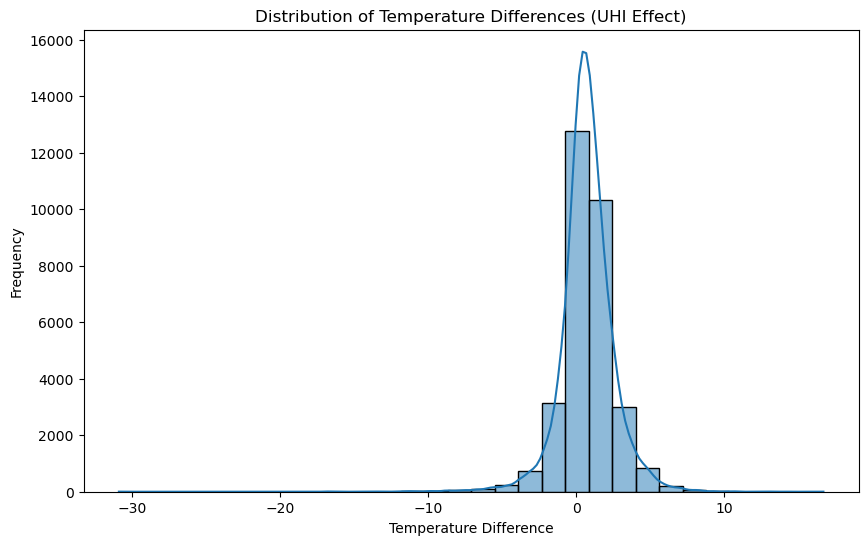

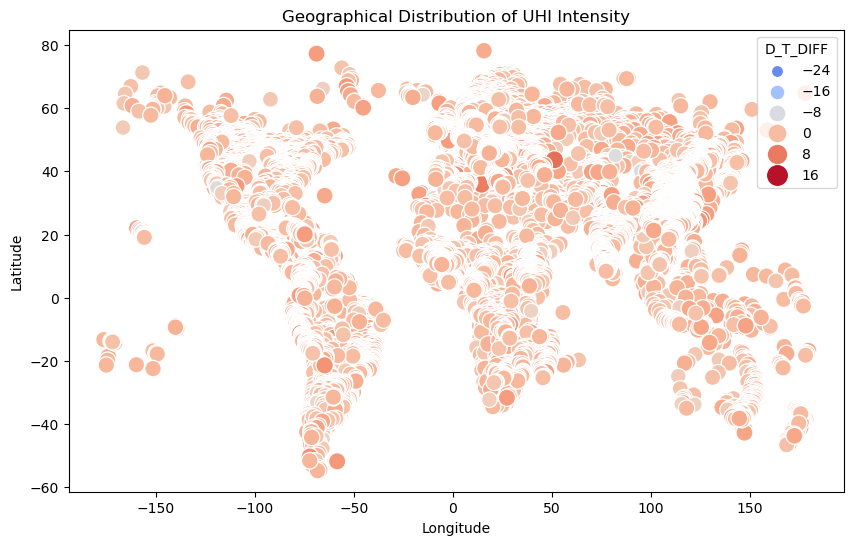

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uhi_data = pd.read_csv('data/cleaned data/cleaned_uhi_data.csv')

print(uhi_data.describe())

plt.figure(figsize=(10, 6))
sns.histplot(uhi_data['D_T_DIFF'], bins=30, kde=True)
plt.title('Distribution of Temperature Differences (UHI Effect)')
plt.xlabel('Temperature Difference')
plt.ylabel('Frequency')
plt.savefig('Figure/uhi_temperature_difference_distribution.png') 
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='D_T_DIFF', data=uhi_data, palette='coolwarm', size='D_T_DIFF', sizes=(20, 200))
plt.title('Geographical Distribution of UHI Intensity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Figure/Geographical Distribution of UHI Intensity.png') 
plt.show()


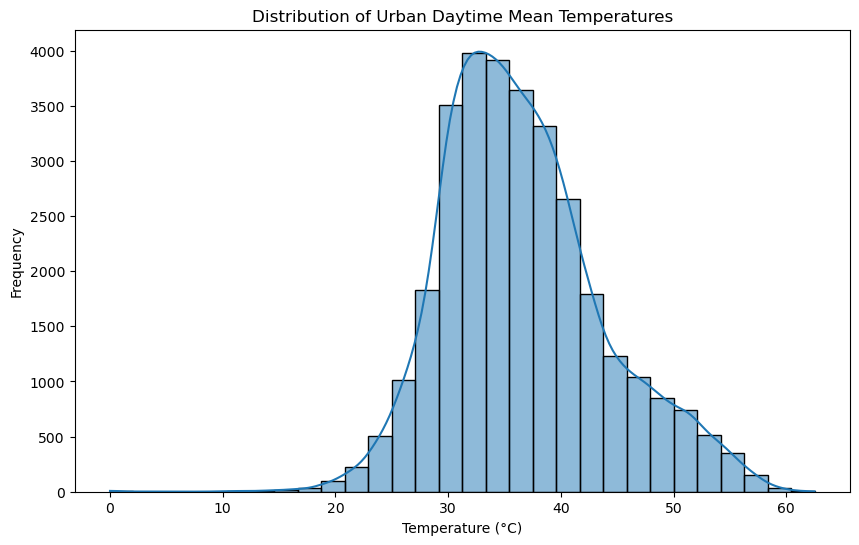

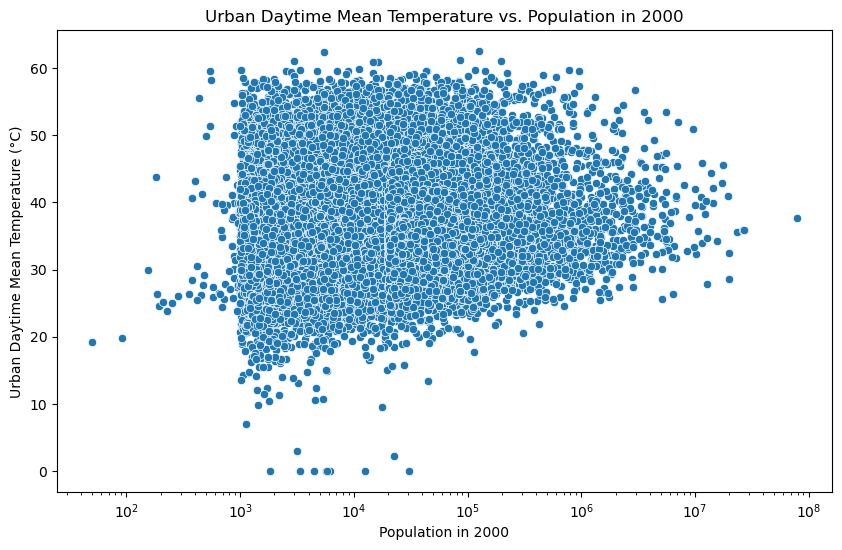

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['URB_D_MEAN'], bins=30, kde=True)
plt.title('Distribution of Urban Daytime Mean Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.savefig('Figure/Distribution of Urban Daytime Mean Temperatures.png') 
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ES00POP'], y=data['URB_D_MEAN'])
plt.title('Urban Daytime Mean Temperature vs. Population in 2000')
plt.xlabel('Population in 2000')
plt.ylabel('Urban Daytime Mean Temperature (°C)')
plt.xscale('log')
plt.savefig('Figure/Urban Daytime Mean Temperature vs. Population in 2000.png') 
plt.show()


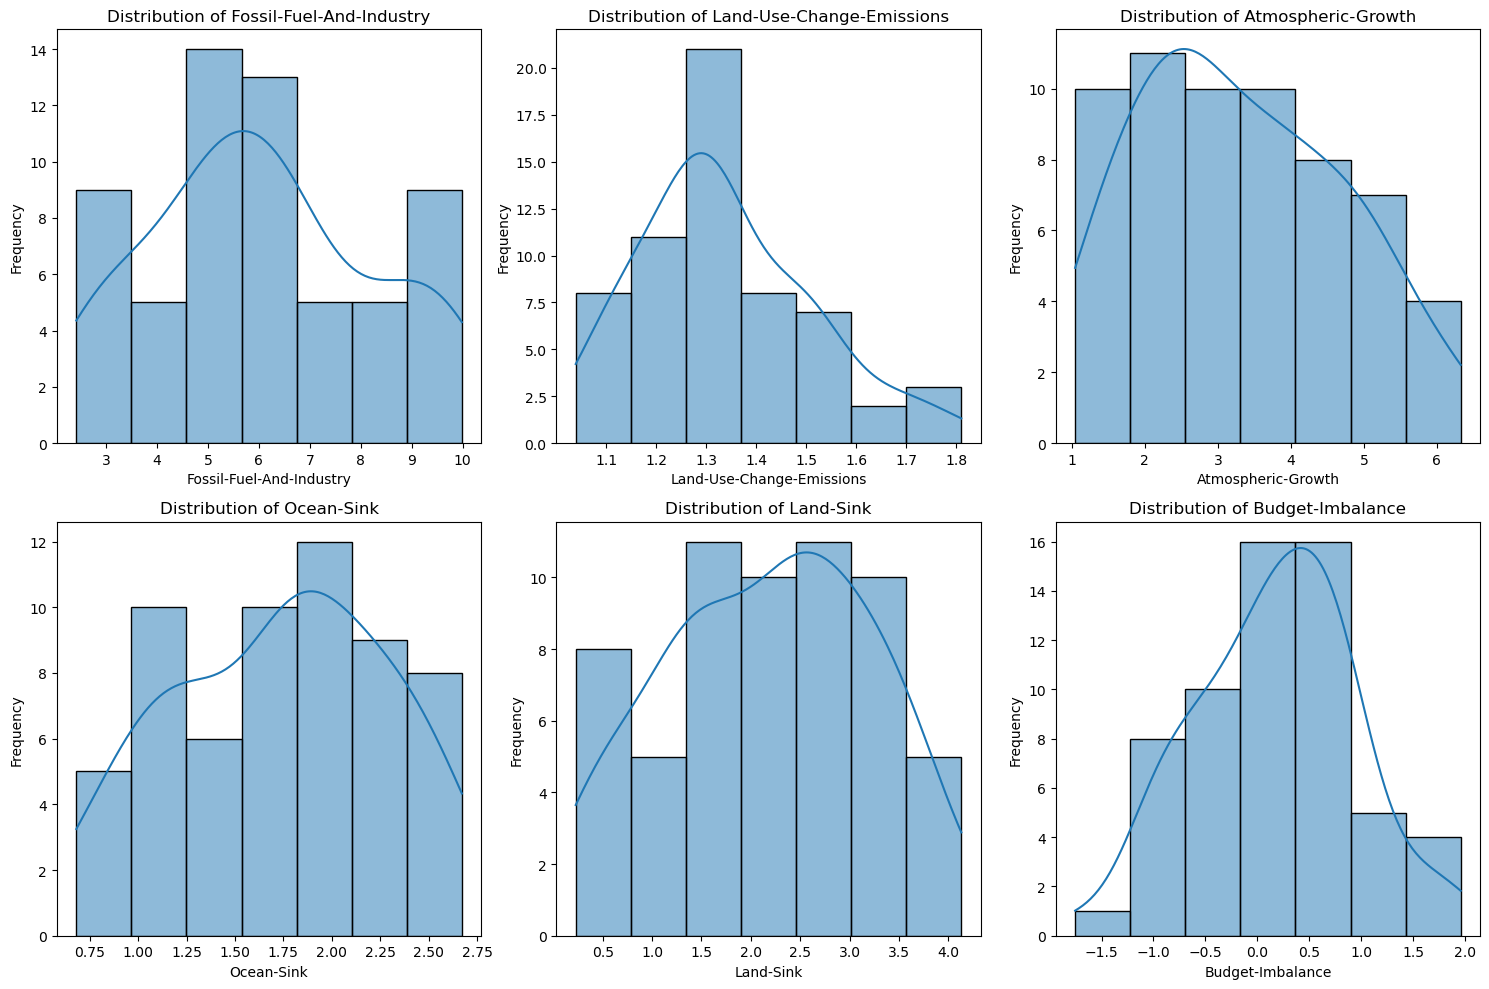

,Year,Fossil-Fuel-And-Industry,Land-Use-Change-Emissions,Atmospheric-Growth,Ocean-Sink,Land-Sink,Budget-Imbalance
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1988.500000,6.047467,1.338533,3.305167,1.736917,2.171983,0.171917
std,17.464249,2.174932,0.174364,1.400173,0.552360,1.028651,0.766677
min,1959.000000,2.417000,1.039000,1.044000,0.681000,0.227000,-1.754000
25%,1973.750000,4.622500,1.217750,2.236750,1.283000,1.422250,-0.389500
50%,1988.500000,6.022000,1.307500,3.120500,1.810500,2.259500,0.207500
75%,2003.250000,7.502000,1.468000,4.361250,2.168500,2.991750,0.667000
max,2018.000000,9.982000,1.810000,6.326000,2.671000,4.130000,1.957000


In [5]:
global_carbon_budget_cleaned = pd.read_csv('data/cleaned data/cleaned_global_carbon_budget.csv')
carbon_budget_stats = global_carbon_budget_cleaned.describe()

def plot_histograms(dataframe):
    plt.figure(figsize=(15, 10))
    features = ['Fossil-Fuel-And-Industry', 'Land-Use-Change-Emissions', 'Atmospheric-Growth', 'Ocean-Sink', 'Land-Sink', 'Budget-Imbalance']
    for i, feature in enumerate(features):
        plt.subplot(2, 3, i+1)
        sns.histplot(dataframe[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('Figure/plot_histograms.png', dpi=300, bbox_inches='tight')
    plt.show() 

plot_histograms(global_carbon_budget_cleaned)

carbon_budget_stats


## Feature Selection

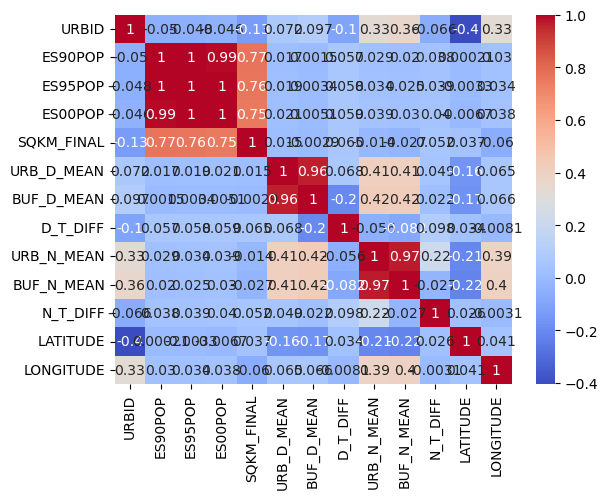

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('data/raw data/shp/cleaned_data.csv')

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig('Figure/plot_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## Machine Learning

Mean Squared Error: 50.15717035983987


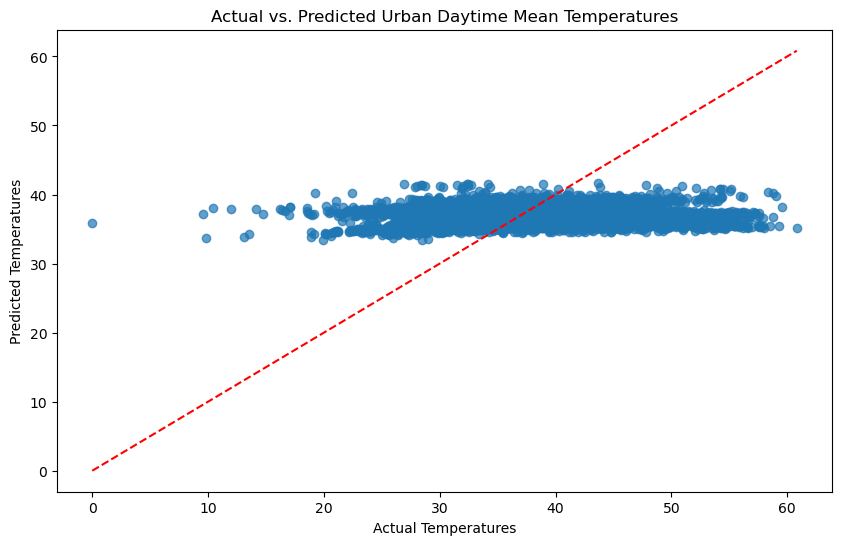

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
X = data[['ES00POP', 'SQKM_FINAL', 'LATITUDE', 'LONGITUDE']]  # example feature set
y = data['URB_D_MEAN']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line showing perfect predictions
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs. Predicted Urban Daytime Mean Temperatures')
plt.savefig('Figure/Actual vs. Predicted Urban Daytime Mean Temperatures.png')
plt.show()


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.2279
Root Mean Squared Error (RMSE): 0.4235
R² Score: 0.9468



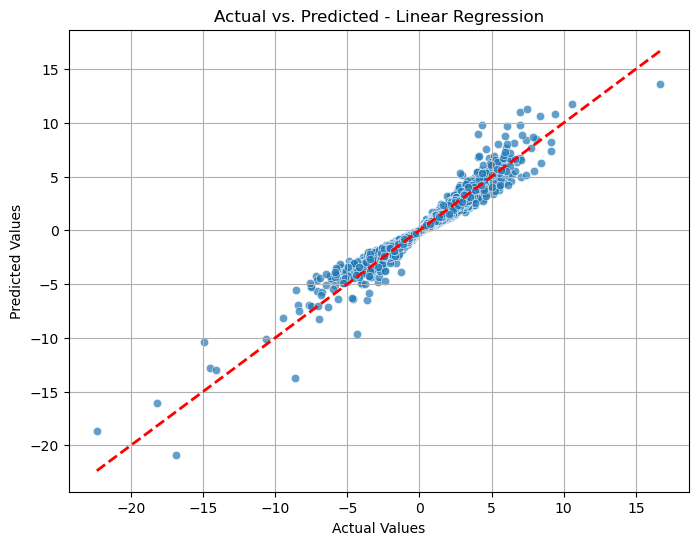

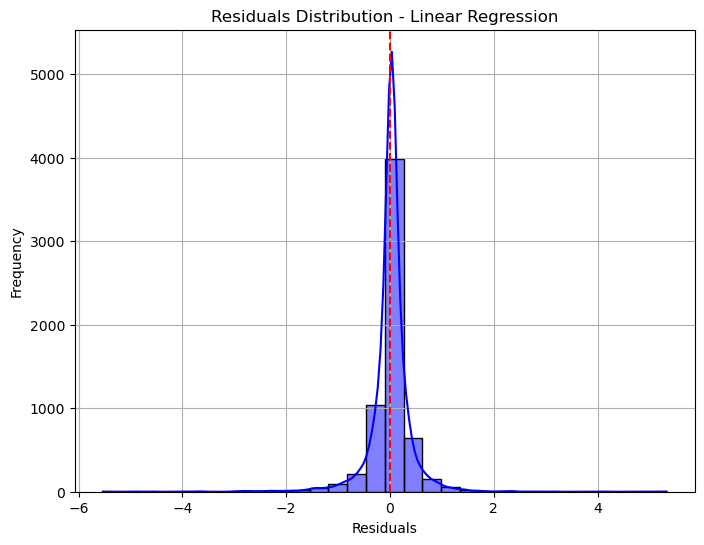

SVR Model Evaluation:
Mean Absolute Error (MAE): 1.2295
Root Mean Squared Error (RMSE): 1.8101
R² Score: 0.0282



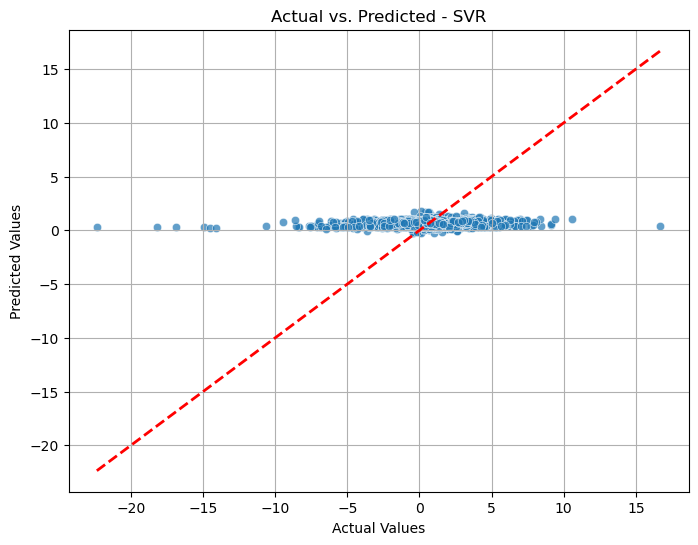

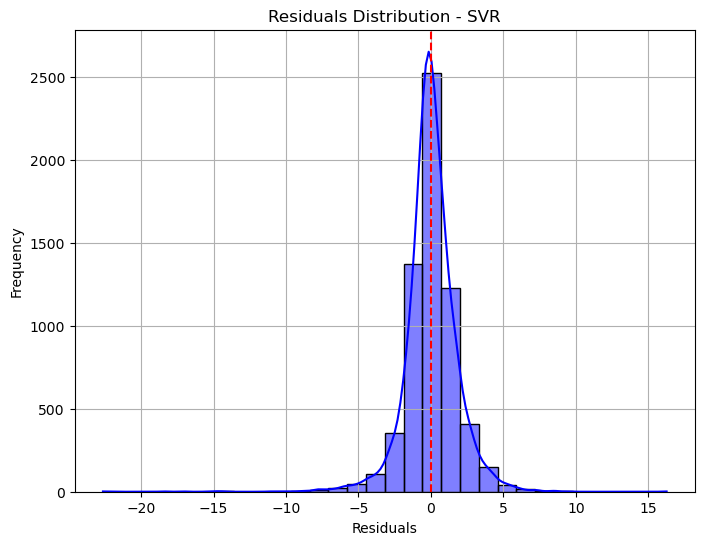

Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.1255
Root Mean Squared Error (RMSE): 0.2968
R² Score: 0.9739



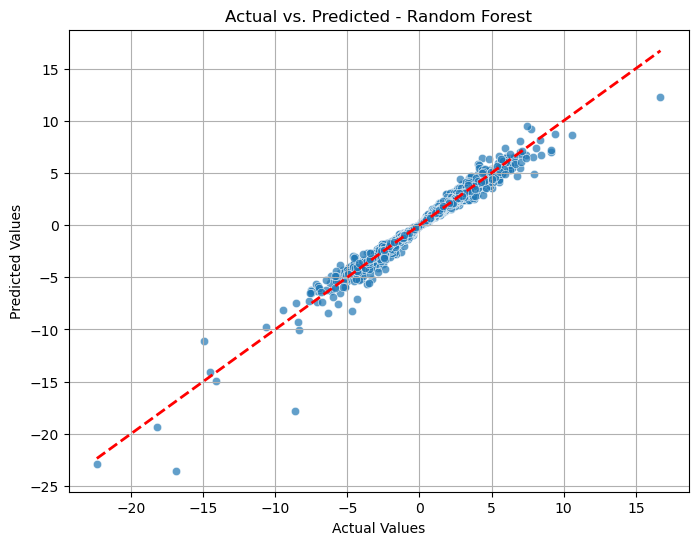

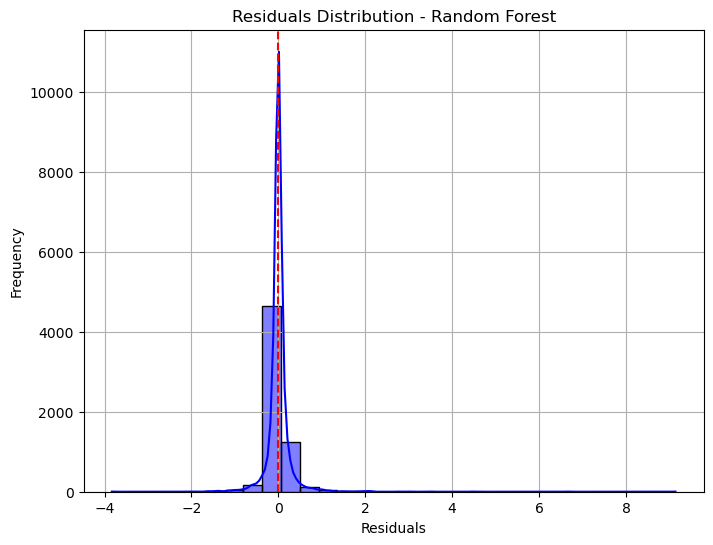

Gradient Boosting Model Evaluation:
Mean Absolute Error (MAE): 0.1744
Root Mean Squared Error (RMSE): 0.3424
R² Score: 0.9652



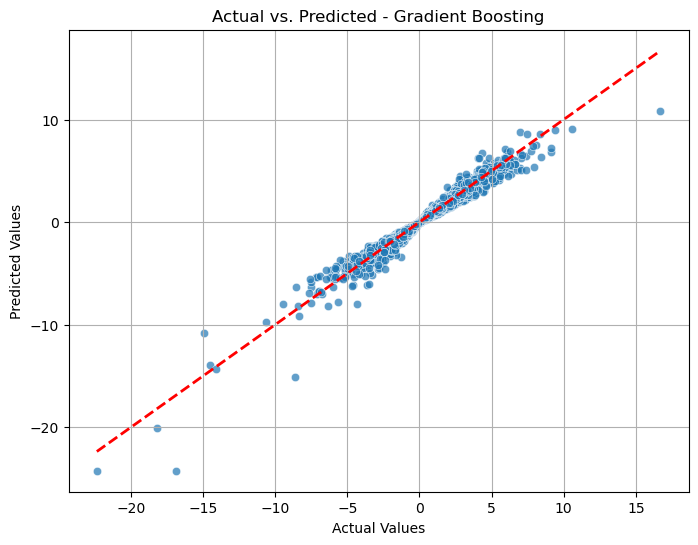

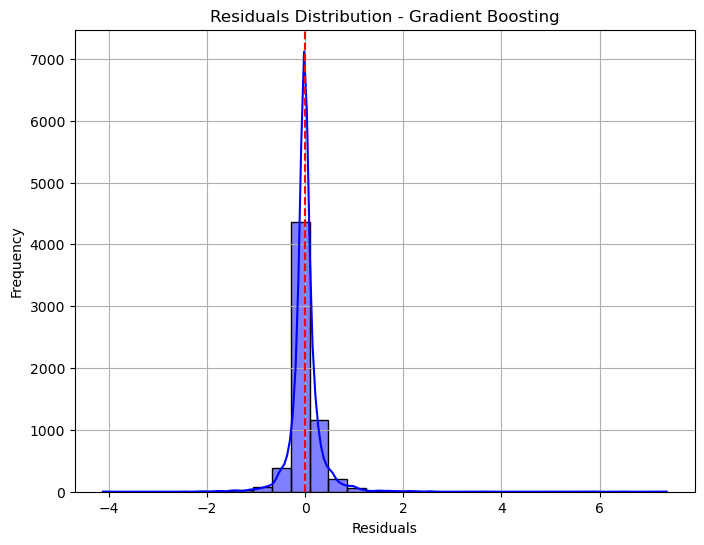

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_path = 'data/cleaned data/cleaned_uhi_data.csv'
df = pd.read_csv(data_path)

# Define features and target
features = ['LATITUDE', 'LONGITUDE', 'Norm_T_Diff']
target = 'D_T_DIFF'

# Prepare data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train, predict, and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f"{name} Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.title(f"Actual vs. Predicted - {name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.savefig('Figure/Actual vs. Predicted.png')
    plt.show()

    residuals = y_test - predictions
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30, color='blue')
    plt.title(f"Residuals Distribution - {name}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.axvline(x=0, color='red', linestyle='--')
    plt.grid(True)
    plt.savefig('Figure/Residuals Distribution.png')
    plt.show()


In [13]:
from codecarbon import EmissionsTracker

# Initialize the emissions tracker
tracker = EmissionsTracker()

# Start tracking the carbon emissions
tracker.start()

# Stop the emissions tracker
emissions = tracker.stop()

# Print the total emissions measured
print(f"{emissions:.4f} kg of CO2 were emitted by this computation.")


[codecarbon INFO @ 19:05:17] [setup] RAM Tracking...
[codecarbon INFO @ 19:05:17] [setup] GPU Tracking...
[codecarbon INFO @ 19:05:17] No GPU found.
[codecarbon INFO @ 19:05:17] [setup] CPU Tracking...
[codecarbon WARNING @ 19:05:17] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 19:05:17] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 19:05:17] >>> Tracker's metadata:
[codecarbon INFO @ 19:05:17]   Platform system: macOS-12.6-arm64-arm-64bit
[codecarbon INFO @ 19:05:17]   Python version: 3.10.13
[codecarbon INFO @ 19:05:17]   CodeCarbon version: 2.8.0
[codecarbon INFO @ 19:05:17]   Available RAM : 8.000 GB
[codecarbon INFO @ 19:05:17]   CPU count: 8
[codecarbon INFO @ 19:05:17]   CPU model: Apple M1
[codecarbon INFO @ 19:05:17]   GPU count: None
[codecarbon INFO @ 19:05:17]   GPU model: None
[codecarbon INFO @ 19:05:18] Saving emissions data to f

0.0000 kg of CO2 were emitted by this computation.
